# Descriptives for GSS Reproducibility Project

Notes
--

- Command used to dump tables from lanl database on Rhodes to be put on OSDC:
        mysqldump -p -P3307 -u misha --socket=/mnt/ide1/mysql/var/mysql.sock1  lanl gss_question > gss_question.sql
        
# Tables

gss_corpus
--
This is the core table and contains information about all of the articles linked to GSS variables. Some of these are book chapters and things didn't have access to, but most we do. It also has variables that correspond to other datasets used.

Core variables:

- true_article_id
- author_[variables]
- title
- publication_title
- volume
- year_published
- file name (the PDF, html and/or texts associated with each of the articles examined as it exists in a file: gss_files) 
- 'doc_type',
- 'citation_type',
- 'author_1_prefix',
- 'author_1_last_name',
- 'author_1_first_name',
- 'author_1_middle_name',
 'author_1_suffix',
 'author_2_prefix',
 'author_2_first_name',
 'author_2_last_name',
 'author_2_middle_name',
 'author_2_suffix',
 'author_3_prefix',
 'author_3_first_name',
 'author_3_last_name',
 'author_3_middle_name',
 'author_3_suffix',
- 'title',
 'pages',
 'pub_id',
- 'publication_title',
 'publisher',
 'volume',
- 'year_published',
 'month_published',
 'publisher_country',
 'publisher_city',
 'state',
 'document_name',
 'conference',
 'editor_first_name',
 'editor_mi',
 'editor_last_name',
 'editor_2_first_name',
 'editor_2_mi',
 'editor_2_last_name',
- 'gss_years',
- 'other_datasets',
- 'abstract',
 'citation',
 'brief_type',
 'docket_number',
 'chapter_name',
 'edition',
 'isbn',
- 'variables',
 'report_no',
- 'file_name',
 'file_url',
 'file_id',
 'unique_pub_id',
 'round',
 'batch',
 'coder1',
 'coder2',
 'coder3',
 'coder4',
 'coder5',
 'coder6',
 'posterior_PaperCorrect',
 'posterior_Central',
 'posterior_Analysis',
 'posterior_Approach'

gss_variables
--
gss_variable_codes
--
These describe the variables (and all of the answers/codes associated with each questions and their individual meanings).

gss_variable_links
--
This links the articles in gss_corpus with the variables used within them.

Core variables:
		
- true_article_id
- variable

gss_question
--
These are responses to the survey about each article

gss_variable_ques
--
These are responses to the survey about each variable (in each article)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from numpy import nan
import sys
sys.path.append('../')
import GSSUtility as GU
import seaborn as sns
import MySQLdb
from random import sample # numpy has its own np.random.sample which works differently and overwrites "random.sample"

In [2]:
%matplotlib inline

In [3]:
# sns.axes_style


In [4]:
custom_style = {'axes.facecolor': 'white',
                'grid.color': '0.15',
                'grid.linestyle':'-.'}
sns.set_style("darkgrid", rc=custom_style)

In [5]:
# things moved to '  mysql -h 'klab.c3se0dtaabmj.us-west-2.rds.amazonaws.com'   -u mteplitskiy -p' per email with W. Catino 2015-02-09
db = MySQLdb.connect(host='klab.c3se0dtaabmj.us-west-2.rds.amazonaws.com', user='mteplitskiy', passwd="mteplitskiy", db="lanl")
c = db.cursor()


In [6]:
c.execute('select gss_years, year_published from gss_corpus')
df = pd.DataFrame([el for el in c.fetchall()], columns=['gss_years_used', 'year_published'])

In [7]:
df.year_published[df.year_published == 0] = nan

/mnt/ide0/home/misha/python/ipython-3.0.0-py2.7.egg/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [146]:
df[df.year_published.notnull()].gss_years_used.value_counts()

                                                                                                                                                                                                                                                                   4172
1987                                                                                                                                                                                                                                                                116
1991                                                                                                                                                                                                                                                                108
1988                                                                                                                                                                                                            

According to he below, there seems to be a sizable number of articles published > 2005
--

In [147]:
df[df.year_published.notnull()].groupby('year_published').count().head()

,gss_years_used
year_published,
1944,1
1972,2
1973,7
1974,24
1975,52


In [148]:
grouped = df[df.year_published.notnull()].groupby('year_published')
grouped.get_group(2004).head()

,gss_years_used,year_published
102,,2004
104,,2004
152,1998,2004
172,,2004
180,,2004


# Number of variables over time

In [11]:
pathToData = '../../Data/'
dataCont = GU.dataContainer(pathToData)
    
articleClasses = GU.filterArticles(dataCont.articleClasses, GSSYearsUsed=True)            

df = pd.DataFrame(columns=['aid', 'yearpublished', 'dvs', 'ivs', 'controls', 'total'])
for a in articleClasses:
    df.loc[a.articleID, :] = np.array([a.articleID, a.yearPublished, a.DVs, a.IVs, a.controls, 0], dtype=object)

df = df[df.yearpublished.notnull()]
df.yearpublished = df.yearpublished.astype(int)
df.aid = df.aid.astype(int)
df.index = df.aid
    
df.dvs = [len(v) for k, v in df.dvs.iteritems()]
df.ivs = [len(v) for k, v in df.ivs.iteritems()]
df.controls = [len(v) for k, v in df.controls.iteritems()]
df.total = df.dvs + df.ivs + df.controls

grouped = df.groupby('yearpublished')

# Number of articles per year in our data

Note: This is using articleClasses, which consists of only articles that survived a fair amount of filtering. 

(array([ 1970.,  1975.,  1980.,  1985.,  1990.,  1995.,  2000.,  2005.,
         2010.]), <a list of 9 Text xticklabel objects>)

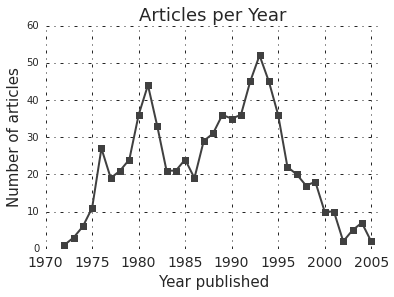

In [12]:
grouped['aid'].count().plot(style='s-', c='0.25', linewidth=2)
# legend(fontsize=15)
plt.xlim((1970, 2006))
plt.title('Articles per Year', fontsize=18)
plt.xlabel('Year published', fontsize=15)
plt.ylabel('Number of articles', fontsize=15)
plt.xticks(fontsize=14)
# plt.savefig('../../Images/descriptives/descriptives--articles-per-year.png', bbox_inches='tight')

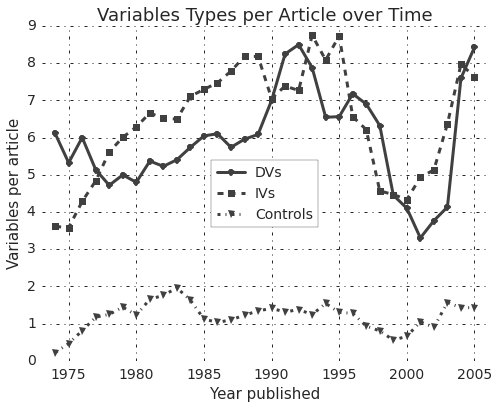

In [69]:
plt.figure(figsize=(8,6))
# grouped.mean()[['dvs', 'ivs', 'controls', 'total']].plot()
means = grouped.mean()
ses = pd.rolling_std(grouped.sum(), window=3, axis=0)

# figsize(())
pd.rolling_mean(means.dvs, window=3).plot(label="DVs", linewidth=3, style='o-', c='0.25') 
pd.rolling_mean(means.ivs, window=3).plot( label="IVs", linewidth=3, style='s--', c='0.25')
pd.rolling_mean(means.controls, window=3).plot( label="Controls", linewidth=3, style='v-.', c='0.25')

# plot(means.index, means['total'], '--', linewidth=1, label="All var's")
plt.xlim((1973, 2006))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Variables Types per Article over Time', fontsize=18)
plt.xlabel('Year published', fontsize=15)
plt.ylabel('Variables per article', fontsize=15)

legend = plt.legend(fontsize=14, loc='center', frameon=True)
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('black')

plt.savefig('../../Images/descriptives/descriptives--variables_per_article_over_time.png', bbox_inches='tight', dpi=150)

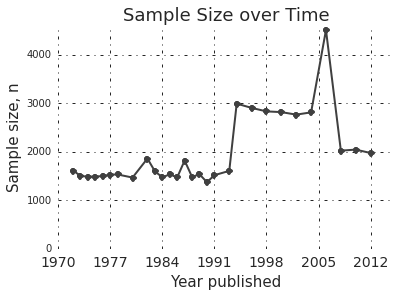

In [136]:
# SAMPLE SIZE OVER TIME
years = np.unique(dataCont.df.index)
sample_sizes = [np.sum(dataCont.df.index==year) for year in years]
plt.plot(years, sample_sizes, 'o-', color='0.25', linewidth=2)
plt.title('Sample Size over Time', fontsize=18)
plt.xlabel('Year published', fontsize=15)
plt.ylabel('Sample size, n', fontsize=15)
# plt.xlim((1974, 2006))
plt.xticks(fontsize=14)
ax = plt.gca()
ax.set_xticks(range(1970, 2015, 7))
plt.ylim(0,4600)
plt.savefig('../../Images/descriptives/descriptives--sample size over time.svg', bbox_inches='tight')

#Descriptives of Model Outcomes

In [8]:
if __name__ == "__main__":    
    
    pathToData = '../../Data/'
    dataCont = GU.dataContainer(pathToData)
    
    articlesToUse = GU.filterArticles(dataCont.articleClasses, GSSYearsUsed=True)            
    print 'len of articleClasses:', len(articlesToUse)
#     raw_input('...')
    
    # define the storage containers for outputs
    outcomes = ['propSig', 'paramSizesNormed', 'Rs', 'adjRs', 'pvalues',  'numTotal', \
                'propSig_CentralVars', 'paramSizesNormed_CentralVars', 'pvalues_CentralVars']
    output = {outcome:[] for outcome in outcomes}
    output['article_id'] = []
    
           
#     for article in sample(articlesToUse, 100):
    for article in articlesToUse:
    #for article in [a for a in articlesToUse if a.articleID == 6755]:
   
        print 'Processing article:', article.articleID
        RHS = article.IVs + article.controls     
        
        for DV in article.DVs:

            for year in article.GSSYearsUsed:
                
                results = GU.runModel(dataCont, year, DV, RHS) # models run on max year of data used
                if not results: continue

                centralVars = []            
                for civ in article.centralIVs:
                    if 'standardize(%s, ddof=1)' % (civ) in results.params.index:
                        centralVars.append('standardize(%s, ddof=1)' % (civ))
                    else: 
                        for col in results.params.index:
                            if 'C(' + civ + ')' in col:
                                centralVars.append(col)


                # The reasoning for the condition below is that authors make two types of arguments for "central" variables, 
                # (1) that the central variable is really important, p < 0.05, or (2) that the central variable is not important (p > 0.05). 
                # What we want to test by replacing the variable with a cognate are arguments of type (1). 
                # Arguments of type (2) are important and testable too, but if we test all of these together, we will obscure both effects.
                # So the condition below ensures that at least one of the central variables was found to be "important" in the original 
                # article.
                # This throws away 67 observations.
#                 if np.all(results.pvalues[centralVars] > 0.05): 
#                     print 'All "central" IVs are p > 0.05. Skipping.'
#                     continue


                output['Rs'].append(results.rsquared) 
                output['adjRs'].append(results.rsquared_adj) 
                output['propSig'].append(float(len([p for p in results.pvalues[1:] if p < 0.05]))/len(results.params[1:])) 
                output['paramSizesNormed'].append(np.mean(results.params[1:].abs())) 
                output['pvalues'].append(np.mean( results.pvalues[1:]))
                output['numTotal'].append( 1 ) #divide by len of R^2 array to get a mean of variables estimated PER model                           
                if centralVars:
                    output['pvalues_CentralVars'].append(np.mean(results.pvalues[centralVars]))               
                    output['propSig_CentralVars'].append(float(len([p for p in results.pvalues[centralVars] if p < 0.05])) \
                                                            /len(results.params[centralVars])) 
                    output['paramSizesNormed_CentralVars'].append(np.mean(results.params[centralVars].abs()))                    
                else: 
                    output['pvalues_CentralVars'].append(nan)
                    output['propSig_CentralVars'].append(nan)
                    output['paramSizesNormed_CentralVars'].append(nan)
                    
                output['article_id'].append(article.articleID) 

len of articleClasses: 728
Processing article: 1
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
Processing article: 9
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is constant
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is constant
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is constant
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is c

KeyboardInterrupt: 

#Create dataframe to store *output*

In [76]:
df_output = pd.DataFrame(output, index=output['article_id'])
del df_output['numTotal']
print len(df_output)
print len(set(df_output.index))

4737
316


#Plot outcome distributions

RsMean: 0.081, s.d.: 0.080
adjRsMean: 0.073, s.d.: 0.078
paramSizesNormedMean: 0.170, s.d.: 0.126
paramSizesNormed_CentralVarsMean: 0.161, s.d.: 0.122
propSigMean: 0.399, s.d.: 0.264
propSig_CentralVarsMean: 0.401, s.d.: 0.302
pvaluesMean: 0.282, s.d.: 0.166
pvalues_CentralVarsMean: 0.279, s.d.: 0.186


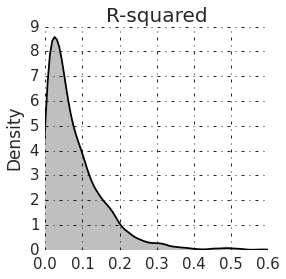

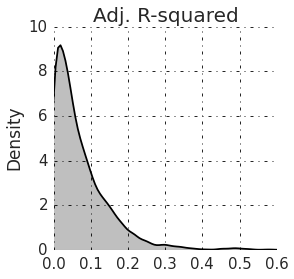

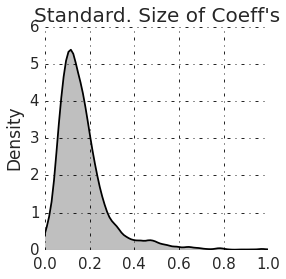

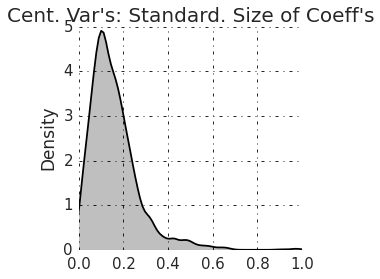

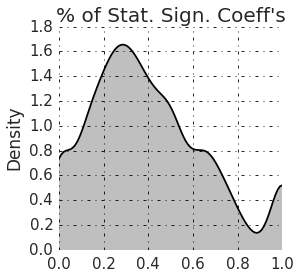

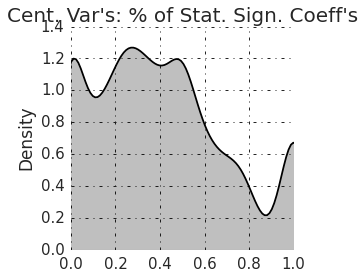

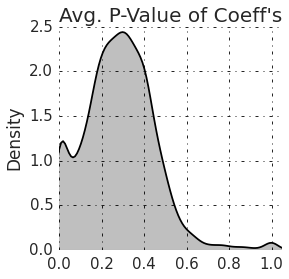

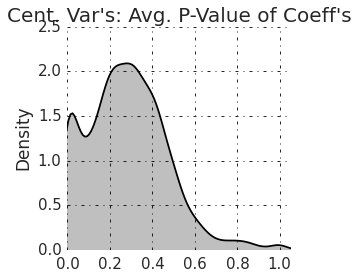

In [79]:
outcomeMap = {'propSig':"% of Stat. Sign. Coeff's", 
              'paramSizesNormed':"Standard. Size of Coeff's",
              'Rs':'R-squared', 
              'adjRs':'Adj. R-squared',
              'pvalues':"Avg. P-Value of Coeff's",
              'propSig_CentralVars':"Cent. Var's: % of Stat. Sign. Coeff's",
              'paramSizesNormed_CentralVars':"Cent. Var's: Standard. Size of Coeff's", 
              'pvalues_CentralVars':"Cent. Var's: Avg. P-Value of Coeff's"}

for outcome in df_output.columns:
    if outcome=='article_id': continue
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Density', fontsize=17)


    plt.title(outcomeMap[outcome], fontsize=20)
    print outcome + 'Mean: %0.3f, s.d.: %0.3f' % (df_output[outcome].mean(), df_output[outcome].std())

    sns.kdeplot(df_output[outcome].dropna(), shade=True, color='black', legend=False)
#     sns.kdeplot(df2_output[outcome].dropna(), shade=False, color='blue', legend=False)

    if '%' in outcomeMap[outcome] or 'P-value' in outcomeMap[outcome] or 'Size' in outcomeMap[outcome]:
        plt.xlim((0,1))
    elif 'R-' in outcomeMap[outcome]:
        plt.xlim(0,0.6)
    else:
        plt.xlim(0, 1.05*df_output[outcome].max())
    #     df_output[outcome].dropna().plot(kind='kde', color='black', linewidth=3)

#     df_output[outcome].hist(bins=30)
#     savefig('../../Images/descriptives--' + outcome + '.svg', bbox_inches='tight')